In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict


In [1]:
%store 

Stored variables and their in-db values:
AVA_0_df                               ->            0         1         2         3        
AVA_RME_labels                         -> array(['AVA', 'AVA', 'AVA', 'AVA', 'AVA', 'AVA', '
AVA_RME_pcoords                        -> array([[ 2.07991102e-01, -1.30040395e-01,  2.60703
AVA_RME_pcoords_15dim                  -> array([[-0.12600773,  0.08347497,  0.14896734, ...
AVA_RME_pcoords_sphere                 -> array([[-0.25741366,  0.62091017, -0.72604386],
  
AVA_RME_stim0_labels                   -> array(['AVA', 'AVA', 'AVA', 'AVA', 'AVA', 'AVA', '
AVA_RME_stim0_pcoords                  -> array([[-0.12281661, -0.05609896, -0.21207597, -0.
AVA_RME_stim1_labels                   -> array(['AVA', 'AVA', 'AVA', 'AVA', 'AVA', 'AVA', '
AVA_RME_stim1_pcoords                  -> array([[ 4.50658786e-01,  4.15805332e-02,  1.84402
AVA_RME_worm_labels                    -> array(['worm 0', 'worm 0', 'worm 0', 'worm 0', 'wo
ON_OFF_labels                

In [2]:
%store -r all_ws_clustered


In [3]:
all_ws_clustered

,0,1,2,3,4,5,6,7,8,9,...,1593,1594,1595,1596,1597,1598,1599,cell_type,worm_id,entropy
0,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.087761,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250,ON,0,5.150506
1,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.147703,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826,ON,0,5.448032
2,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.125827,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742,ON,0,5.481223
3,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.070331,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949,ON,0,5.231055
4,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.148310,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321,ON,0,5.975454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.451667,0.260361,0.374523,0.333417,0.296303,0.298341,0.353166,0.275606,0.337890,0.325894,...,0.075282,0.125328,0.123972,0.106423,0.056287,0.071927,0.138741,RME,6,6.581221
180,0.161421,0.122925,0.152240,0.113289,0.108943,0.120792,0.113263,0.112031,0.109941,0.129438,...,0.019681,0.037760,0.027895,0.011420,0.013922,0.007703,0.034923,SMDV,6,5.720223
181,0.369088,0.340746,0.314790,0.297447,0.256540,0.212337,0.201304,0.296253,0.233145,0.227632,...,0.069591,0.087507,0.083285,0.035668,0.048541,0.059006,0.046408,SMDV,6,6.464723
182,0.091142,0.103064,0.103241,0.086204,0.096538,0.102718,0.094449,0.066989,0.092214,0.087939,...,0.162653,0.182036,0.159335,0.197864,0.206459,0.220786,0.211384,SMDD,6,5.613714


In [5]:
all_ws_clustered.iloc[: ,:  -3]


,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.061334,0.054821,0.094158,0.087761,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250
1,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.089011,0.139586,0.090089,0.147703,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826
2,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.119727,0.099837,0.117549,0.125827,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742
3,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.056177,0.036667,0.069045,0.070331,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949
4,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.113334,0.057722,0.054529,0.148310,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.451667,0.260361,0.374523,0.333417,0.296303,0.298341,0.353166,0.275606,0.337890,0.325894,...,0.143480,0.146509,0.106031,0.075282,0.125328,0.123972,0.106423,0.056287,0.071927,0.138741
180,0.161421,0.122925,0.152240,0.113289,0.108943,0.120792,0.113263,0.112031,0.109941,0.129438,...,0.019539,0.023911,0.022255,0.019681,0.037760,0.027895,0.011420,0.013922,0.007703,0.034923
181,0.369088,0.340746,0.314790,0.297447,0.256540,0.212337,0.201304,0.296253,0.233145,0.227632,...,0.073534,0.079672,0.034247,0.069591,0.087507,0.083285,0.035668,0.048541,0.059006,0.046408
182,0.091142,0.103064,0.103241,0.086204,0.096538,0.102718,0.094449,0.066989,0.092214,0.087939,...,0.094275,0.135084,0.181331,0.162653,0.182036,0.159335,0.197864,0.206459,0.220786,0.211384


In [9]:
# pd has no rows attribute, use _, to ignore index, added iterrows() 
activity_sums = []
for _, row in all_ws_clustered.iloc[: , : -3].iterrows():
    activity_sums.append(sum(row))



In [13]:
activity_sums = np.array(activity_sums)
all_ws_clustered['activity_sums'] = activity_sums


In [14]:
all_ws_clustered

,0,1,2,3,4,5,6,7,8,9,...,1594,1595,1596,1597,1598,1599,cell_type,worm_id,entropy,activity_sums
0,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250,ON,0,5.150506,197.016617
1,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826,ON,0,5.448032,182.980127
2,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742,ON,0,5.481223,210.802331
3,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949,ON,0,5.231055,197.424127
4,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321,ON,0,5.975454,253.449246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.451667,0.260361,0.374523,0.333417,0.296303,0.298341,0.353166,0.275606,0.337890,0.325894,...,0.125328,0.123972,0.106423,0.056287,0.071927,0.138741,RME,6,6.581221,462.153412
180,0.161421,0.122925,0.152240,0.113289,0.108943,0.120792,0.113263,0.112031,0.109941,0.129438,...,0.037760,0.027895,0.011420,0.013922,0.007703,0.034923,SMDV,6,5.720223,310.039398
181,0.369088,0.340746,0.314790,0.297447,0.256540,0.212337,0.201304,0.296253,0.233145,0.227632,...,0.087507,0.083285,0.035668,0.048541,0.059006,0.046408,SMDV,6,6.464723,414.342537
182,0.091142,0.103064,0.103241,0.086204,0.096538,0.102718,0.094449,0.066989,0.092214,0.087939,...,0.182036,0.159335,0.197864,0.206459,0.220786,0.211384,SMDD,6,5.613714,258.719369


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='activity_sums', data=all_ws_clustered)
plt.title('Activity Sums by Cell Type')
plt.xlabel('Cell Type')
plt.ylabel('Activity Sums')
plt.show()

In [17]:
all_ws_clustered

,0,1,2,3,4,5,6,7,8,9,...,1594,1595,1596,1597,1598,1599,cell_type,worm_id,entropy,activity_sums
0,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250,ON,0,5.150506,197.016617
1,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826,ON,0,5.448032,182.980127
2,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742,ON,0,5.481223,210.802331
3,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949,ON,0,5.231055,197.424127
4,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321,ON,0,5.975454,253.449246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.451667,0.260361,0.374523,0.333417,0.296303,0.298341,0.353166,0.275606,0.337890,0.325894,...,0.125328,0.123972,0.106423,0.056287,0.071927,0.138741,RME,6,6.581221,462.153412
180,0.161421,0.122925,0.152240,0.113289,0.108943,0.120792,0.113263,0.112031,0.109941,0.129438,...,0.037760,0.027895,0.011420,0.013922,0.007703,0.034923,SMDV,6,5.720223,310.039398
181,0.369088,0.340746,0.314790,0.297447,0.256540,0.212337,0.201304,0.296253,0.233145,0.227632,...,0.087507,0.083285,0.035668,0.048541,0.059006,0.046408,SMDV,6,6.464723,414.342537
182,0.091142,0.103064,0.103241,0.086204,0.096538,0.102718,0.094449,0.066989,0.092214,0.087939,...,0.182036,0.159335,0.197864,0.206459,0.220786,0.211384,SMDD,6,5.613714,258.719369


In [18]:
packets = defaultdict(lambda: defailtdict(list))

In [ ]:
#how to append
packets['key1']['subkey1'].append(averages)
packets[row][bin].append(averages)

# packets

In [20]:
#dictionary with each cell from from all_ws_clustered and its binned avg activities
packets = defaultdict(lambda: defaultdict(list))

bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for _, row in all_ws_clustered.iloc[: ,: -4 ].iterrows():
    for bin_size in bins :
        for i in range (0, len(row), bin_size):
            chunk = row[i:i+bin_size]
            averages = np.mean(chunk)
            packets[_][bin_size].append(averages)







In [25]:
color_discrete_map={'ON': 'teal', 'OFF': '#FF8C00', 'AVA': 'red', 'RME': 'blue', 'SMDV': 'purple', 'SMDD': 'yellow'}

In [32]:
all_ws_clustered

,0,1,2,3,4,5,6,7,8,9,...,1594,1595,1596,1597,1598,1599,cell_type,worm_id,entropy,activity_sums
0,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250,ON,0,5.150506,197.016617
1,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826,ON,0,5.448032,182.980127
2,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742,ON,0,5.481223,210.802331
3,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949,ON,0,5.231055,197.424127
4,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321,ON,0,5.975454,253.449246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.451667,0.260361,0.374523,0.333417,0.296303,0.298341,0.353166,0.275606,0.337890,0.325894,...,0.125328,0.123972,0.106423,0.056287,0.071927,0.138741,RME,6,6.581221,462.153412
180,0.161421,0.122925,0.152240,0.113289,0.108943,0.120792,0.113263,0.112031,0.109941,0.129438,...,0.037760,0.027895,0.011420,0.013922,0.007703,0.034923,SMDV,6,5.720223,310.039398
181,0.369088,0.340746,0.314790,0.297447,0.256540,0.212337,0.201304,0.296253,0.233145,0.227632,...,0.087507,0.083285,0.035668,0.048541,0.059006,0.046408,SMDV,6,6.464723,414.342537
182,0.091142,0.103064,0.103241,0.086204,0.096538,0.102718,0.094449,0.066989,0.092214,0.087939,...,0.182036,0.159335,0.197864,0.206459,0.220786,0.211384,SMDD,6,5.613714,258.719369


In [67]:
on_indices = all_ws_clustered.index[all_ws_clustered['cell_type'] == 'ON'].tolist()
off_indices = all_ws_clustered.index[all_ws_clustered['cell_type'] == 'OFF'].tolist()
ava_indices = all_ws_clustered.index[all_ws_clustered['cell_type'] == 'AVA'].tolist()
rme_indices = all_ws_clustered.index[all_ws_clustered['cell_type'] == 'RME'].tolist()
smdd_indices = all_ws_clustered.index[all_ws_clustered['cell_type'] == 'SMDD'].tolist()
smdv_indices = all_ws_clustered.index[all_ws_clustered['cell_type'] == 'SMDV'].tolist()

In [35]:
#average activity for each cell type
on_avg = all_ws_clustered.iloc[on_indices, : -4].mean()
off_avg = all_ws_clustered.iloc[off_indices, : -4].mean()
ava_avg = all_ws_clustered.iloc[ava_indices, : -4].mean()
rme_avg = all_ws_clustered.iloc[rme_indices, : -4].mean()
smdd_avg = all_ws_clustered.iloc[smdd_indices, : -4].mean()
smdv_avg = all_ws_clustered.iloc[smdv_indices, : -4].mean()

In [53]:
on_avg.shape

(1600,)

In [56]:
# concatenate averages and convert to dataframe
avg_activities = (pd.concat([on_avg, off_avg, ava_avg, rme_avg, smdv_avg, smdd_avg ], axis=1)).T

In [57]:
avg_activities.shape

(6, 1600)

In [58]:
#avergae packets dictionary
avg_packets = defaultdict(lambda: defaultdict(list))


bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for _, row in avg_activities.iterrows():
    for bin_size in bins :
        for i in range (0, len(row), bin_size):
            chunk = row[i:i+bin_size]
            averages = np.mean(chunk)
            avg_packets[_][bin_size].append(averages)



# Plotting Cluster Averages

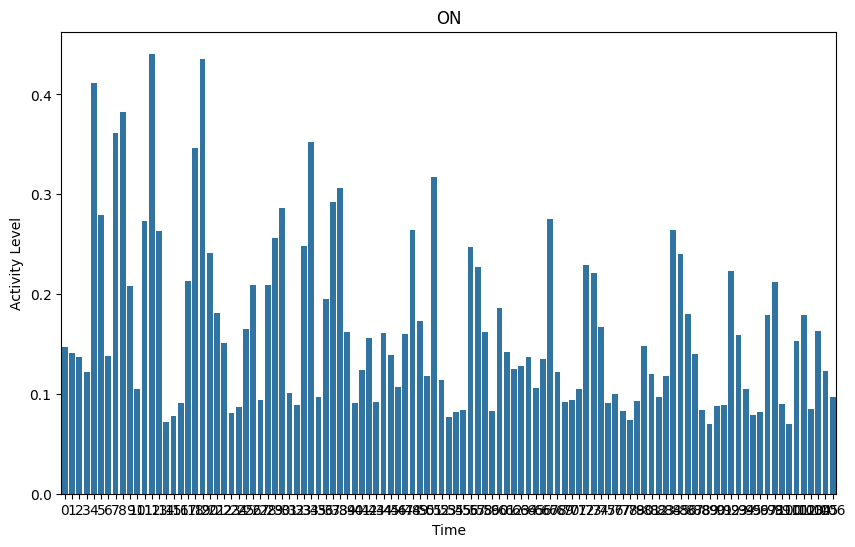

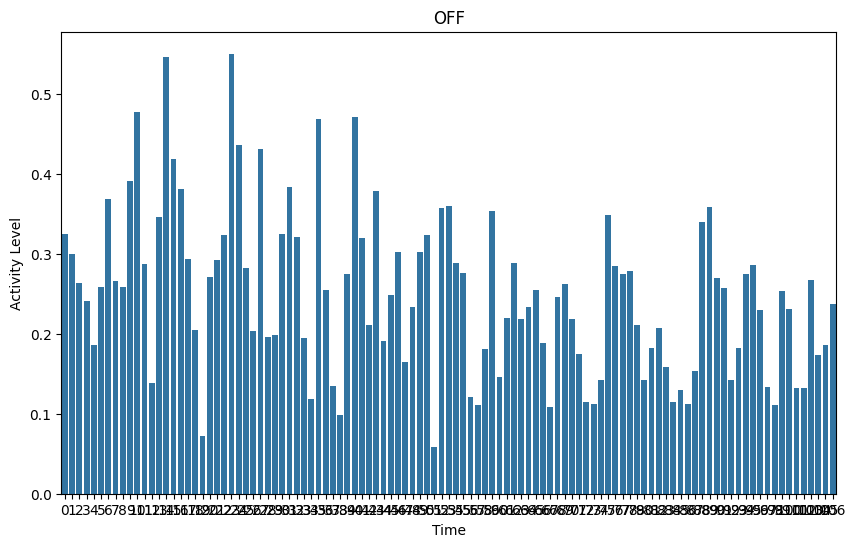

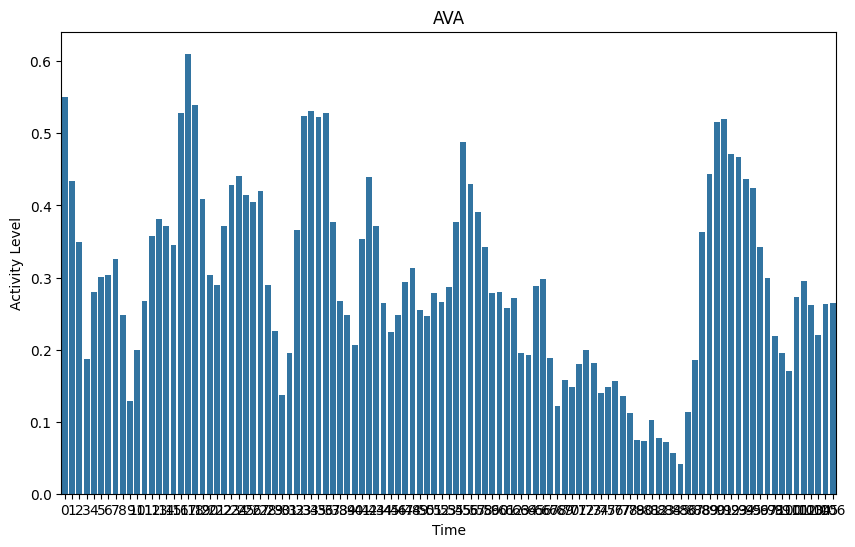

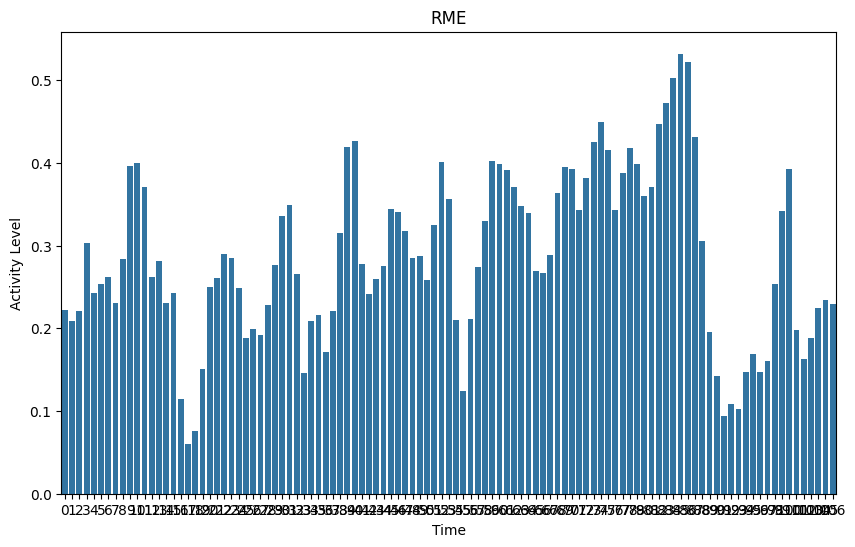

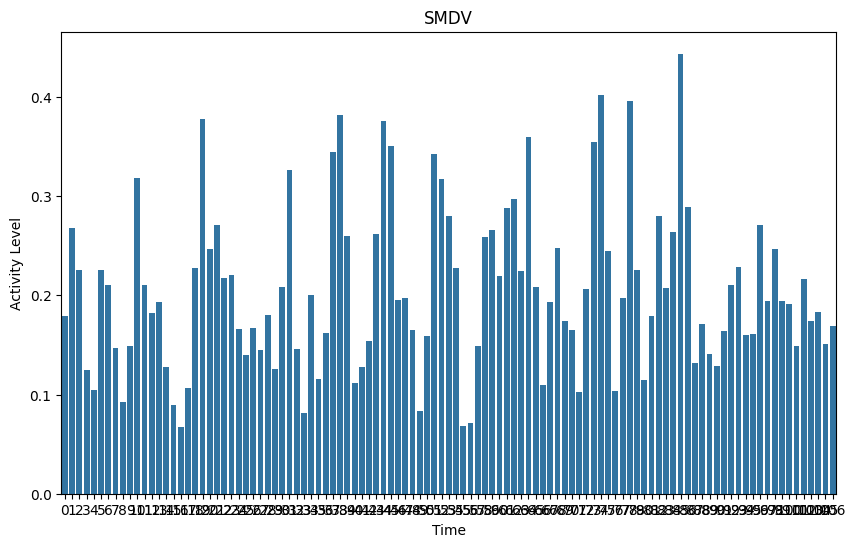

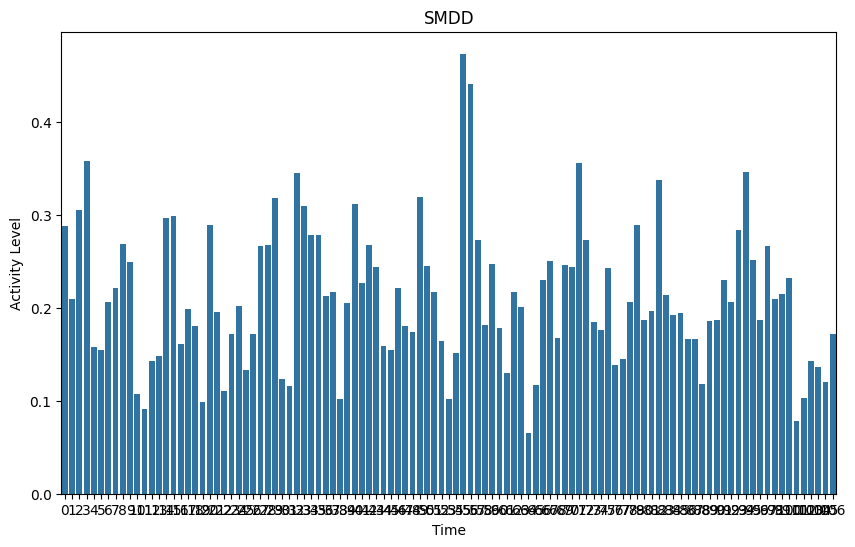

In [61]:
titles = np.array(['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD'])
#options: 5, 10, 15, 20, 25, 30, 35, 40, 45, 50
selected_bin = 15
for i, (outer_keys, inner_keys) in enumerate(avg_packets.items()):
    if selected_bin in inner_keys:
        averages = inner_keys[selected_bin]
        plt.figure(figsize=(10, 6))
        sns.barplot(x=range(0, len(averages)), y=averages)
        plt.ylabel('Activity Level')
        plt.xlabel('Time')
        plt.title(titles[i])
        plt.show()

# Plotting Individual Cells

In [ ]:

#select bin size and plot
#options: 5, 10, 15, 20, 25, 30, 35, 40, 45, 50

titles = all_ws_clustered['cell_type'].values

selected_bin = 5
for i, (outer_keys, inner_keys) in enumerate(packets.items()):
    if selected_bin in inner_keys:
        averages = inner_keys[selected_bin]
        plt.figure(figsize=(10, 6))
        sns.barplot(x=range(0, len(averages)), y=averages)
        plt.ylabel('Activity Level')
        plt.xlabel('Time')
        plt.title(titles[i])
        plt.show()




# Cluster Averages By Worm

In [62]:
all_ws_clustered

,0,1,2,3,4,5,6,7,8,9,...,1594,1595,1596,1597,1598,1599,cell_type,worm_id,entropy,activity_sums
0,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250,ON,0,5.150506,197.016617
1,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826,ON,0,5.448032,182.980127
2,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742,ON,0,5.481223,210.802331
3,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949,ON,0,5.231055,197.424127
4,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321,ON,0,5.975454,253.449246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.451667,0.260361,0.374523,0.333417,0.296303,0.298341,0.353166,0.275606,0.337890,0.325894,...,0.125328,0.123972,0.106423,0.056287,0.071927,0.138741,RME,6,6.581221,462.153412
180,0.161421,0.122925,0.152240,0.113289,0.108943,0.120792,0.113263,0.112031,0.109941,0.129438,...,0.037760,0.027895,0.011420,0.013922,0.007703,0.034923,SMDV,6,5.720223,310.039398
181,0.369088,0.340746,0.314790,0.297447,0.256540,0.212337,0.201304,0.296253,0.233145,0.227632,...,0.087507,0.083285,0.035668,0.048541,0.059006,0.046408,SMDV,6,6.464723,414.342537
182,0.091142,0.103064,0.103241,0.086204,0.096538,0.102718,0.094449,0.066989,0.092214,0.087939,...,0.182036,0.159335,0.197864,0.206459,0.220786,0.211384,SMDD,6,5.613714,258.719369


In [92]:
# worm 0 clustred by cell type

def make_dict(worm_id):
    # Get indices for each cell type
    on_indices = all_ws_clustered.index[(all_ws_clustered['cell_type'] == 'ON') & (all_ws_clustered['worm_id'] == worm_id)].tolist()
    off_indices = all_ws_clustered.index[(all_ws_clustered['cell_type'] == 'OFF') & (all_ws_clustered['worm_id'] == worm_id)].tolist()
    ava_indices = all_ws_clustered.index[(all_ws_clustered['cell_type'] == 'AVA') & (all_ws_clustered['worm_id'] == worm_id)].tolist()
    rme_indices = all_ws_clustered.index[(all_ws_clustered['cell_type'] == 'RME') & (all_ws_clustered['worm_id'] == worm_id)].tolist()
    smdd_indices = all_ws_clustered.index[(all_ws_clustered['cell_type'] == 'SMDD') & (all_ws_clustered['worm_id'] == worm_id)].tolist()
    smdv_indices = all_ws_clustered.index[(all_ws_clustered['cell_type'] == 'SMDV') & (all_ws_clustered['worm_id'] == worm_id)].tolist()

    # Calculate average activity for each cell type
    on_avg = all_ws_clustered.iloc[on_indices, :-4].mean()
    off_avg = all_ws_clustered.iloc[off_indices, :-4].mean()
    ava_avg = all_ws_clustered.iloc[ava_indices, :-4].mean()
    rme_avg = all_ws_clustered.iloc[rme_indices, :-4].mean()
    smdd_avg = all_ws_clustered.iloc[smdd_indices, :-4].mean()
    smdv_avg = all_ws_clustered.iloc[smdv_indices, :-4].mean()

    # Concatenate averages and convert to dataframe
    avg_activities = (pd.concat([on_avg, off_avg, ava_avg, rme_avg, smdv_avg, smdd_avg], axis=1)).T

    avg_activities = pd.DataFrame({
        'ON': on_avg,
        'OFF': off_avg,
        'AVA': ava_avg,
        'RME': rme_avg,
        'SMDV': smdv_avg,
        'SMDD': smdd_avg
    }).T

        #avergae packets dictionary
    avg_packets = defaultdict(lambda: defaultdict(list))


    bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
    for _, row in avg_activities.iterrows():
        for bin_size in bins :
            for i in range (0, len(row), bin_size):
                chunk = row[i:i+bin_size]
                averages = np.mean(chunk)
                avg_packets[_][bin_size].append(averages) 
    avg_packets 
    return avg_packets 

 

In [93]:
avg_packets_0 = make_dict(0)

In [101]:
avg_packets_0['ON'].keys()

dict_keys([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

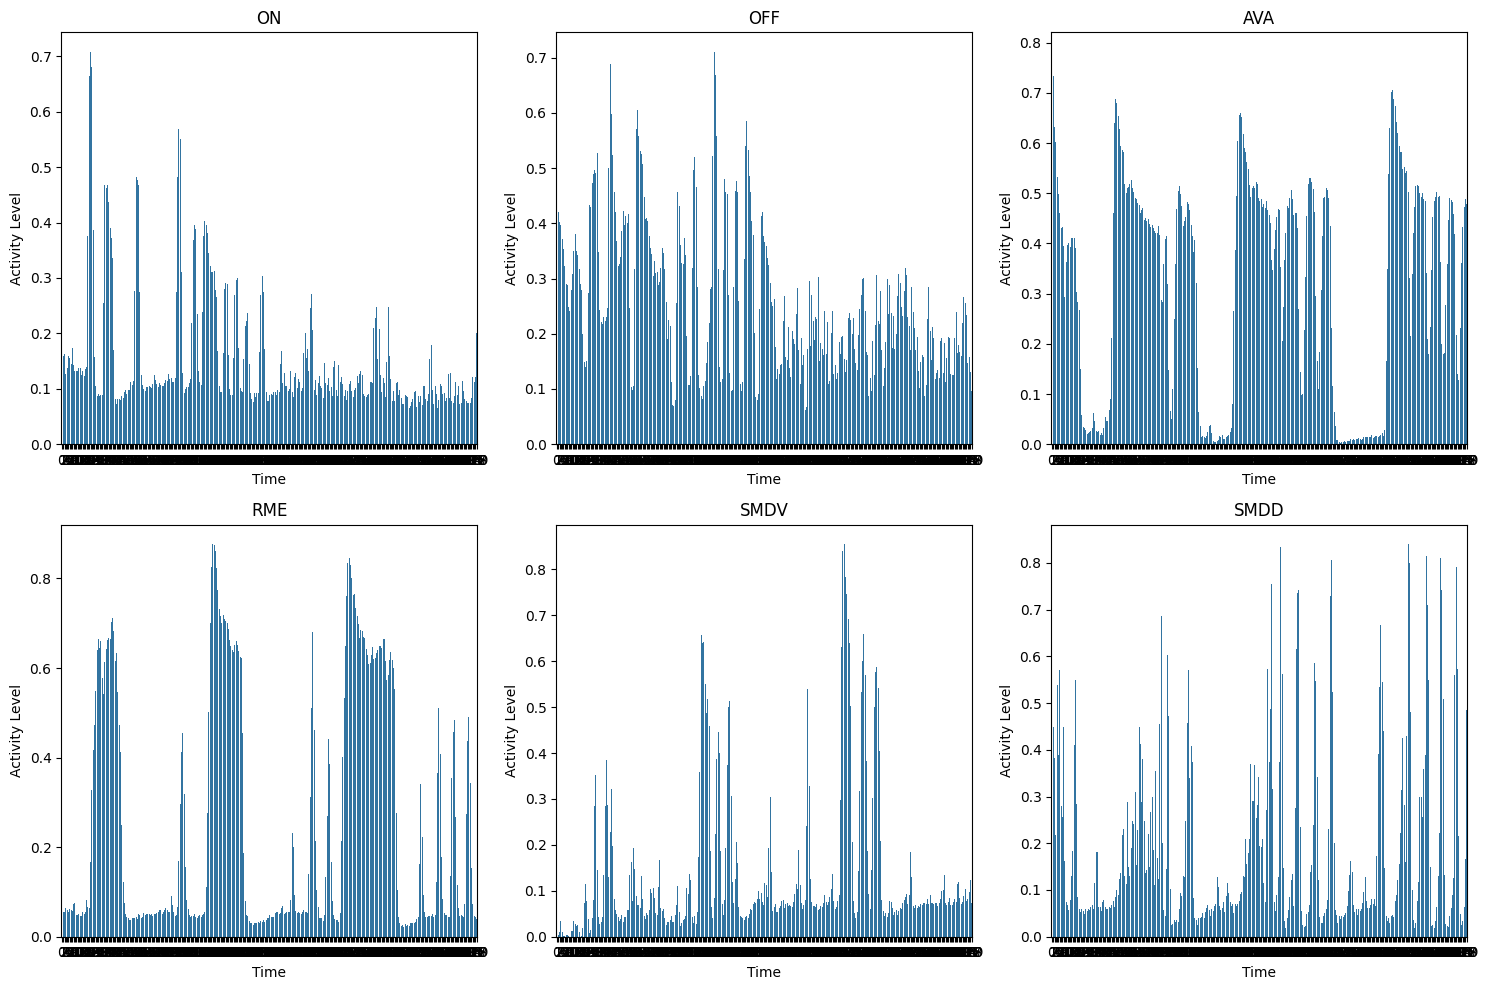

In [112]:
avg_packets_0 = make_dict(0)
titles = np.array(['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD'])

# Bin size to plot
selected_bin = 5

# Number of subplots (based on the number of titles)
num_plots = len(titles)

# Create subplots: Adjust the layout as necessary (e.g., 2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the dictionary and plot each subplot
for i, (outer_key, inner_dict) in enumerate(avg_packets_0.items()):
    if selected_bin in inner_dict:
        averages = inner_dict[selected_bin]
        sns.barplot(x=range(0, len(averages)), y=averages, ax=axes[i])
        axes[i].set_ylabel('Activity Level')
        axes[i].set_xlabel('Time')
        axes[i].set_title(titles[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

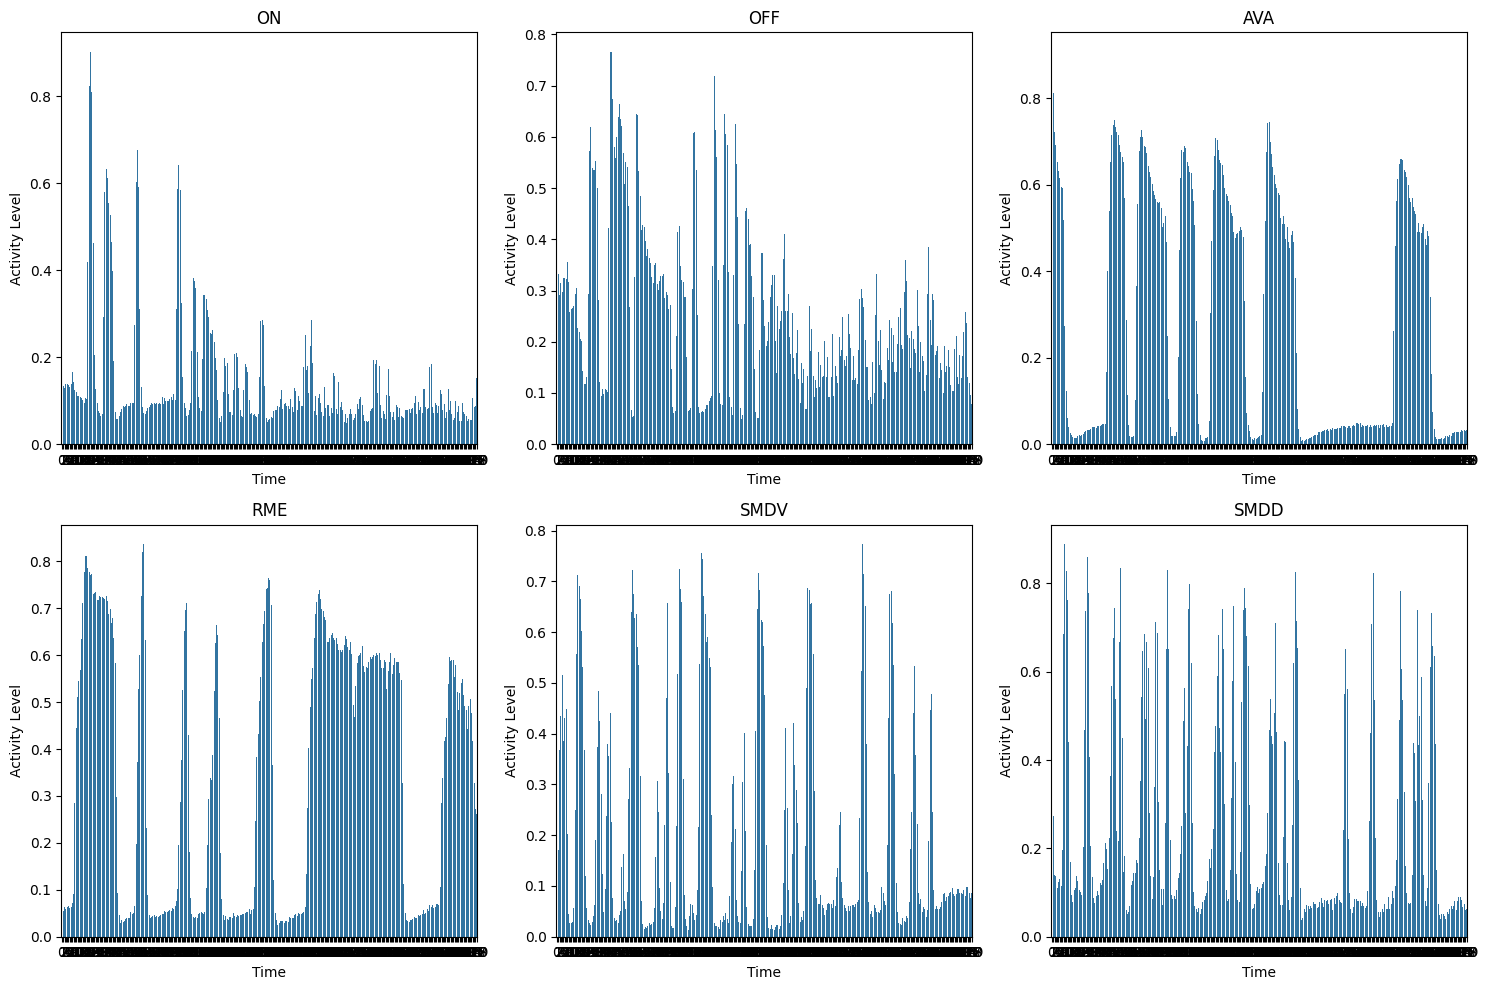

In [109]:
avg_packets_1 = make_dict(1)
titles = np.array(['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD'])

# Bin size to plot
selected_bin = 5

# Number of subplots (based on the number of titles)
num_plots = len(titles)

# Create subplots: Adjust the layout as necessary (e.g., 2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the dictionary and plot each subplot
for i, (outer_key, inner_dict) in enumerate(avg_packets_1.items()):
    if selected_bin in inner_dict:
        averages = inner_dict[selected_bin]
        sns.barplot(x=range(0, len(averages)), y=averages, ax=axes[i])
        axes[i].set_ylabel('Activity Level')
        axes[i].set_xlabel('Time')
        axes[i].set_title(titles[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

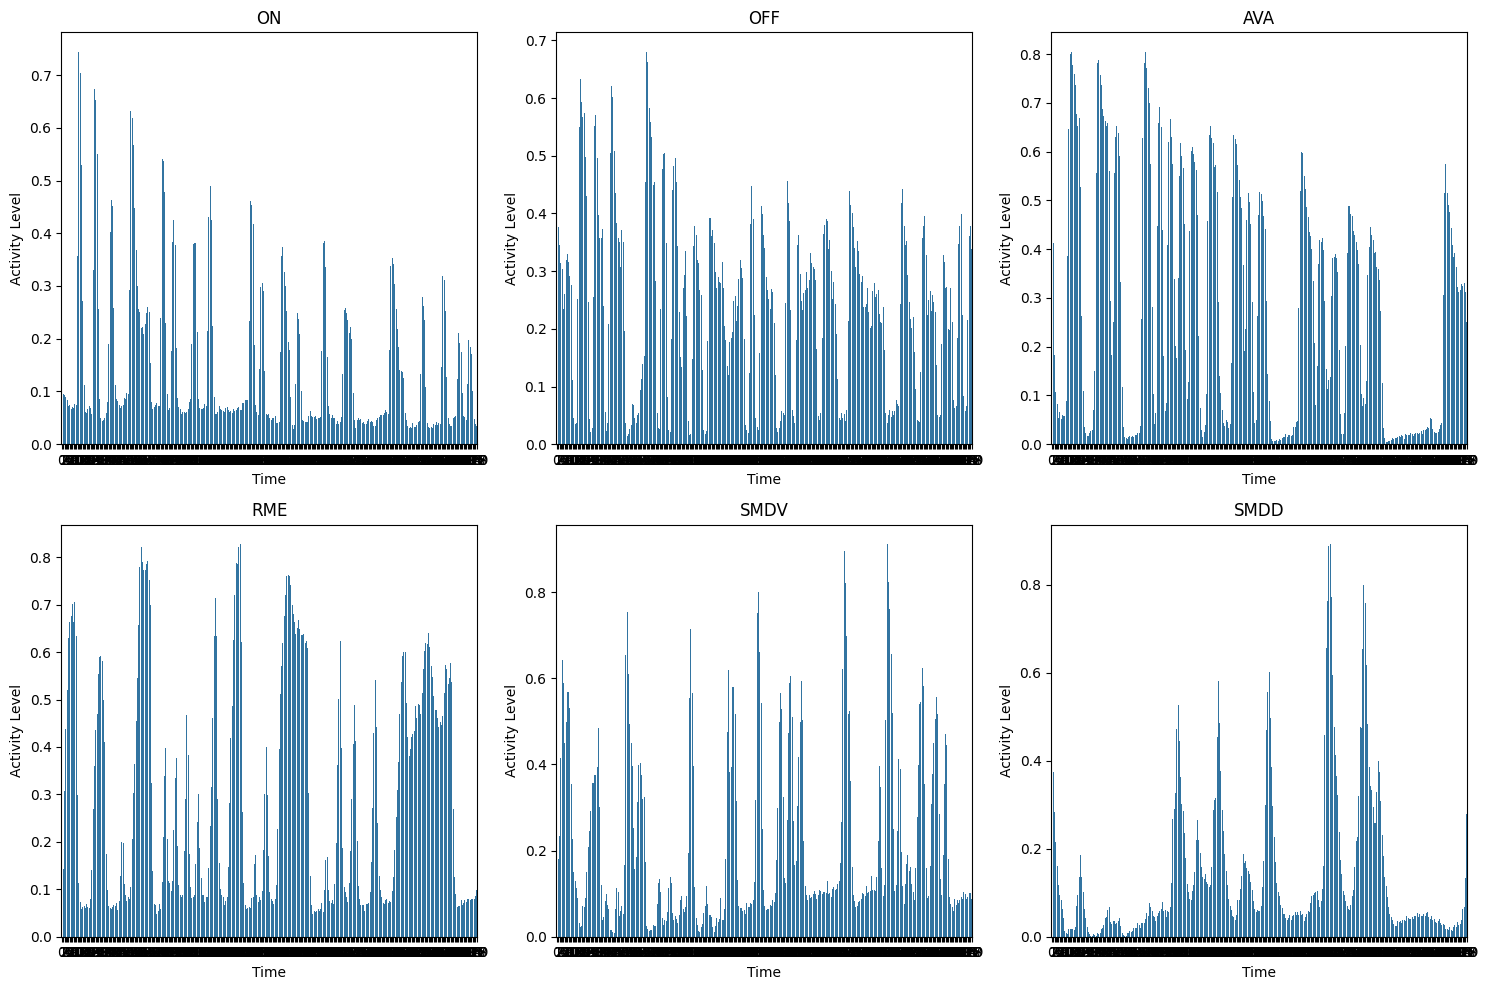

In [108]:
avg_packets_2 = make_dict(2)
titles = np.array(['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD'])

# Bin size to plot
selected_bin = 5

# Number of subplots (based on the number of titles)
num_plots = len(titles)

# Create subplots: Adjust the layout as necessary (e.g., 2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the dictionary and plot each subplot
for i, (outer_key, inner_dict) in enumerate(avg_packets_2.items()):
    if selected_bin in inner_dict:
        averages = inner_dict[selected_bin]
        sns.barplot(x=range(0, len(averages)), y=averages, ax=axes[i])
        axes[i].set_ylabel('Activity Level')
        axes[i].set_xlabel('Time')
        axes[i].set_title(titles[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


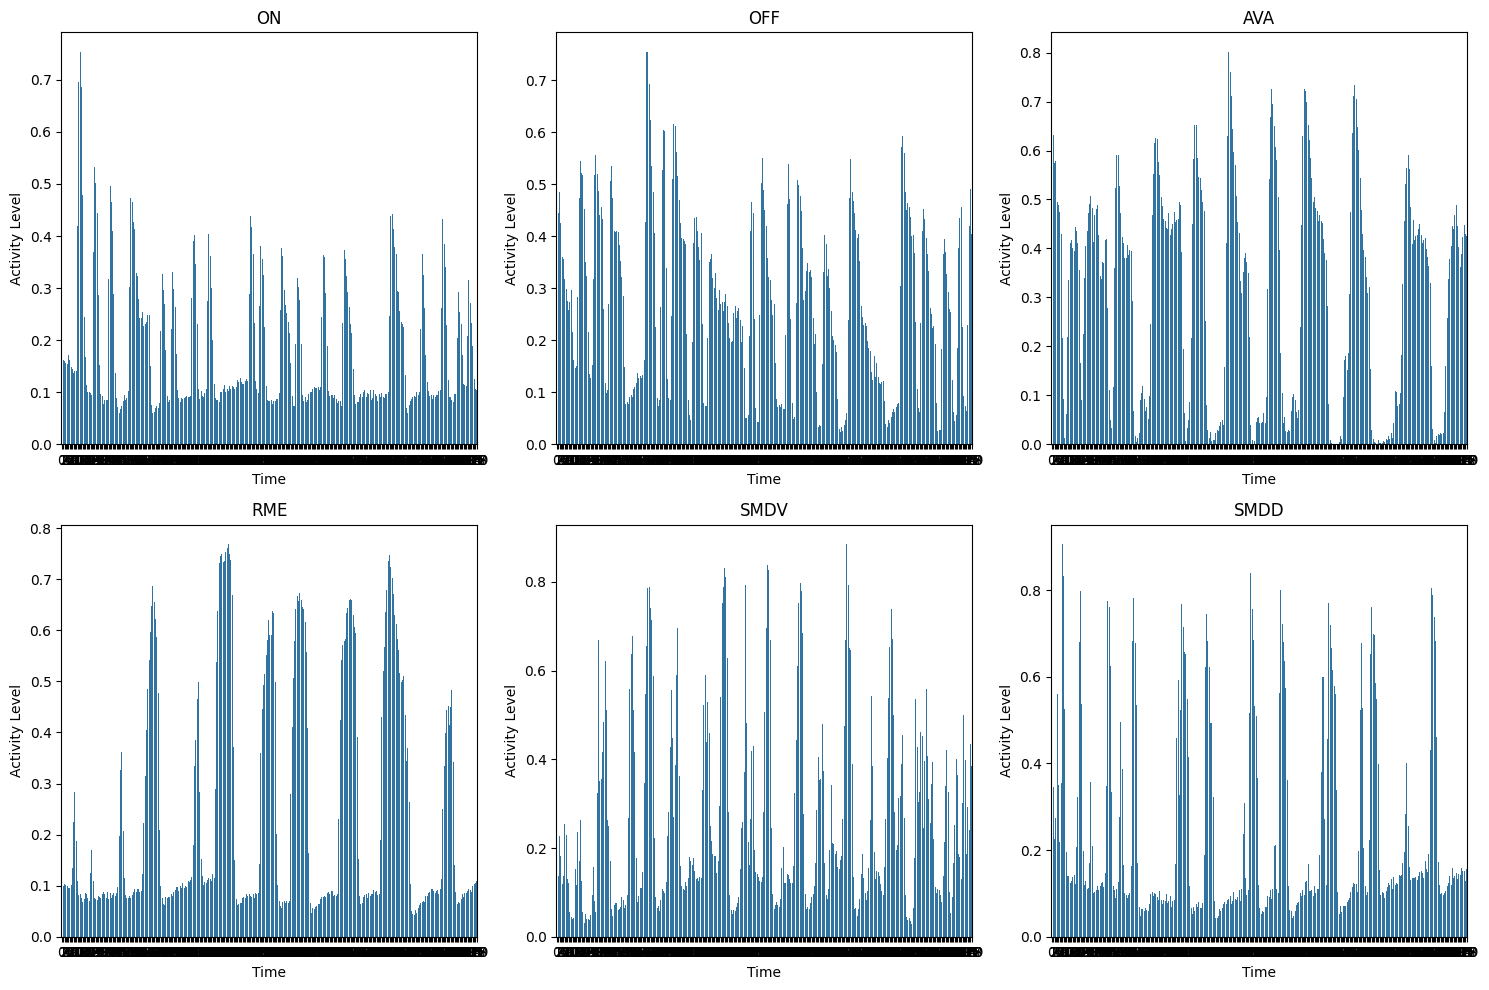

In [113]:
avg_packets_3 = make_dict(3)
titles = np.array(['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD'])

# Bin size to plot
selected_bin = 5

# Number of subplots (based on the number of titles)
num_plots = len(titles)

# Create subplots: Adjust the layout as necessary (e.g., 2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the dictionary and plot each subplot
for i, (outer_key, inner_dict) in enumerate(avg_packets_3.items()):
    if selected_bin in inner_dict:
        averages = inner_dict[selected_bin]
        sns.barplot(x=range(0, len(averages)), y=averages, ax=axes[i])
        axes[i].set_ylabel('Activity Level')
        axes[i].set_xlabel('Time')
        axes[i].set_title(titles[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

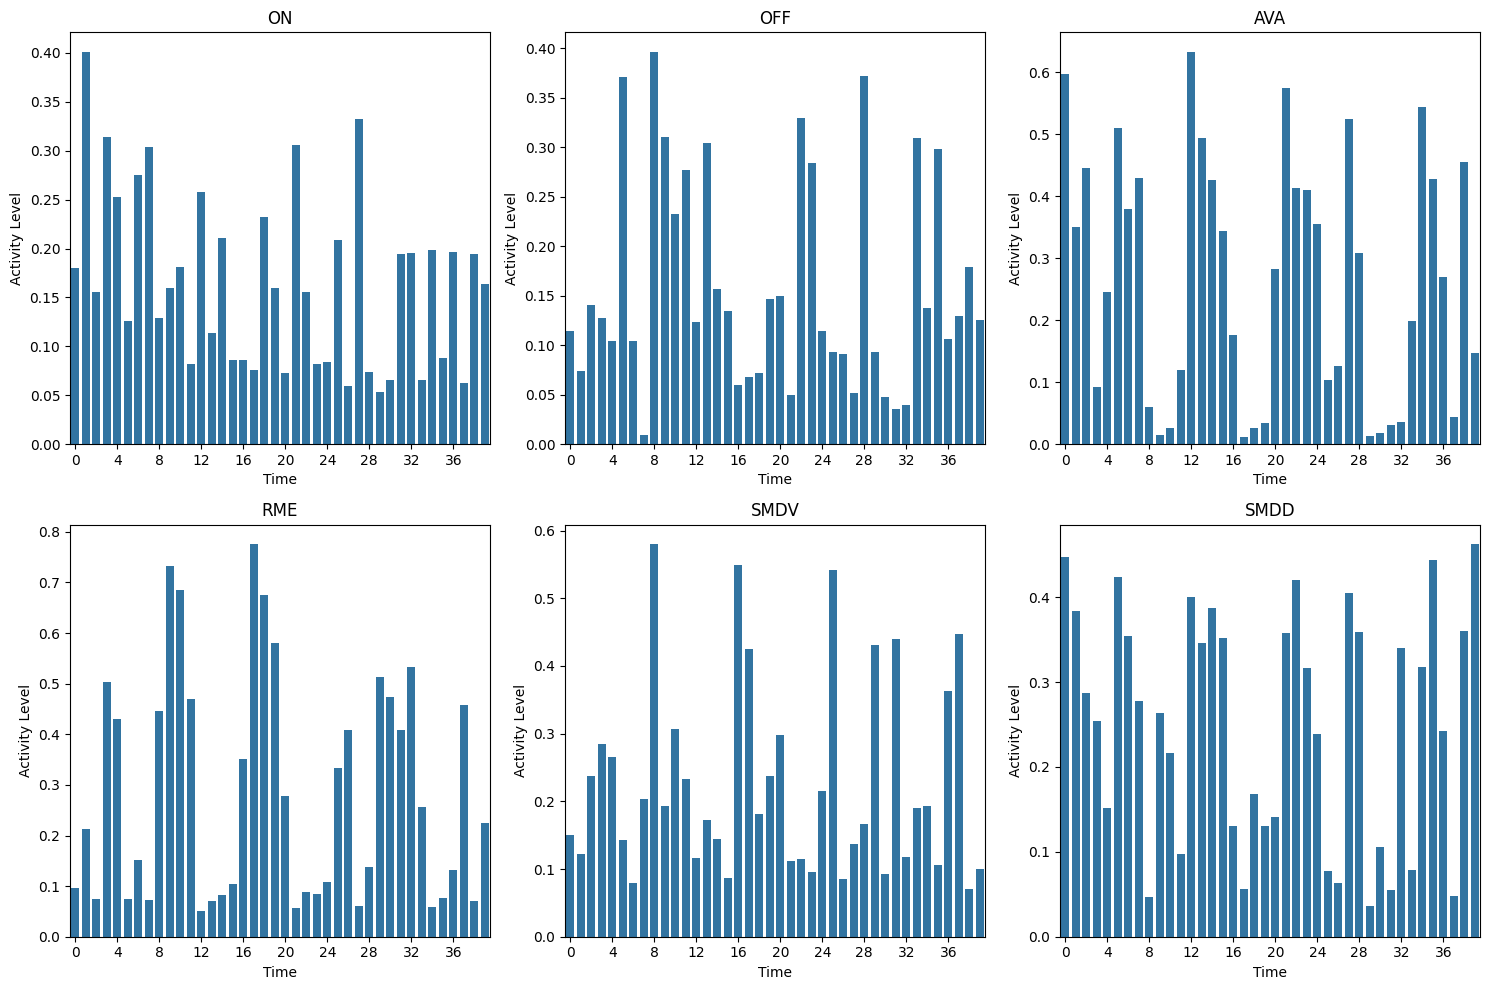

In [122]:
avg_packets_4 = make_dict(4)
titles = np.array(['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD'])

# Bin size to plot
selected_bin = 40

# Number of subplots (based on the number of titles)
num_plots = len(titles)

# Create subplots: Adjust the layout as necessary (e.g., 2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the dictionary and plot each subplot
for i, (outer_key, inner_dict) in enumerate(avg_packets_4.items()):
    if selected_bin in inner_dict:
        averages = inner_dict[selected_bin]
        sns.barplot(x=range(0, len(averages)), y=averages, ax=axes[i])
        axes[i].set_ylabel('Activity Level')
        axes[i].set_xlabel('Time')
        axes[i].set_title(titles[i])


        xticks = np.arange(0, len(averages), max(1, len(averages)//10))  # Adjust this to control tick density
        axes[i].set_xticks(xticks)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()